## Первое задание

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
boston = load_boston()
data=boston.data
target = boston.target
feature_names = boston.feature_names
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Создаем датафреймы

In [4]:
x = pd.DataFrame(data, columns=feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = pd.DataFrame(target, columns=['Цена'])
y.head()

,Цена
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [7]:
### Маштабирование данных

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

Строим модель TSNE

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)

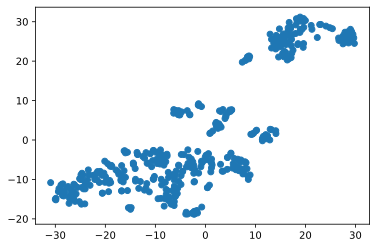

In [12]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

plt.show()

## Второе задание

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = kmeans.fit_predict(x_train_scaled)

Строим диаграмму

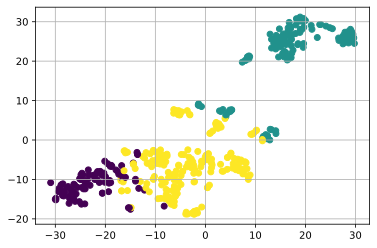

(None, None)

In [15]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)
plt.grid(), plt.show()

Высчитываем среднее значение

In [16]:
print('Первый кластер: ', x_train['CRIM'][labels_train == 0].mean())
print('Второй кластер:', x_train['CRIM'][labels_train == 1].mean())
print('Третий кластер:', x_train['CRIM'][labels_train == 2].mean())

Первый кластер:  0.07356558139534884
Второй кластер: 10.797028425196851
Третий кластер: 0.4216602094240837


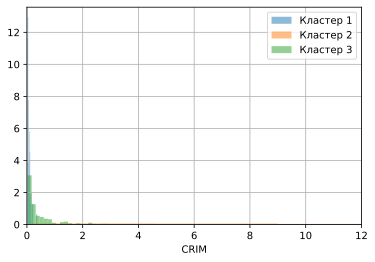

(None, None)

In [17]:
plt.hist(x_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(x_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(x_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.xlabel('CRIM')

plt.grid(), plt.show()

### 3 Задание

In [26]:
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [27]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
x_test_tsne = tsne.fit_transform(x_test_scaled)

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_test = kmeans.fit_predict(x_test_scaled)

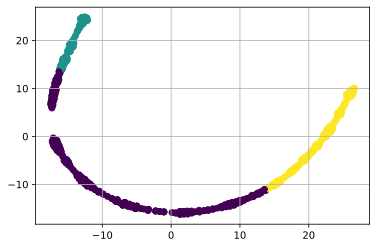

(None, None)

In [29]:
plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1], c=labels_test)
plt.grid(), plt.show()

In [25]:
print('Первый кластер: ', x_test['CRIM'][labels_test == 0].mean())
print('Второй кластер:', x_test['CRIM'][labels_test== 1].mean())
print('Третий кластер:', x_test['CRIM'][labels_test== 2].mean())

KeyError: 'CRIM'